# 우리나라 국민들의 문화활동 데이터 분석

### -성별,연령,소득등 다양한 분류에 따라

## 목차
1. 주제 선정 이유
2. 가설 설정
3. 분석 데이터 내용 및 출처
4. 가설검증
5. 결론

## 1.주제선정 이유
- 우리나라 사람들은 주로 어떤 문화활동을 하면서 시간을 보내는지 그리고 이 활동들이 연령,성별,지역등에 따라 차이가 있는지를 알아내고 분석하고 싶었기 때문이다.

## 2.가설설정
 1) 성별에 따른 문화활동 관람 수 차이 및 선호도 차이는 없을 것이다. 
 
 2) 20,30대의 경우 다른 연령층에 비해서 문화생활 관람 수가 높을 것이다.
 
 3) 소득이 높을 수록 문화생활 방문을 더 자주 할 것이지만 일정 수준 이상의 소득 부터는 차이를 보이지 않을 것이다.
 
 4) 더 많이 선호하는 문화생활의 경우 실제로 더 많이 참여하였을 것이다.

## 3. 분석 데이터 내용 및 출처
분석 데이터의 경우 국가 통계 포털 KOSIS에서 얻었다.
- 통계청, 문화 여가 - 국민여가활동조사 - 국민여가활동 실태 - 지난 1년 동안 한번이상 참여한 여가활동 유형 복수응답 문화예술관람
- 통계청, 문화 여가 - 국민여가활동조사 - 국민여가활동 실태 - 평일에 희망하는 여가활동 복수응답 문화예술관람활동
- 통계청, 문화 여가 - 국민여가활동조사 - 국민여가활동 실태 - 휴일에 희망하는 여가활동 복수응답 문화예술관람활동
- 실제로 참여한 문화활동과 참여한 문화활동간의 차이를 분석하기 위해서 총 3개의 데이터를 분석하는데 사용했다.

 1) 1년 동안 1회 이상 참여한 여가활동
 
 2) 평일에 희망하는 여가활동
 
 3) 휴일에 희망하는 여가활동

In [185]:
import pandas as pd
import warnings
warnings.simplefilter("ignore")

In [186]:
df1 = pd.read_excel("지난_1년_동안_한번이상_참여한_여가활동_유형_복수응답_문화예술관람활동_20230519032934.xlsx")
df2 = pd.read_excel("평일에_희망하는_여가활동_복수응답__문화예술_관람활동_20230519033125.xlsx")
df3 = pd.read_excel("휴일에_희망하는_여가활동_복수응답__문화예술_관람활동_20230519033146.xlsx")
df1 = df1.replace({'연예공연 관람': '-'}, 0)
df1 = df1.replace({'음악연주회 관람': '-'}, 0)
df1 = df1.replace({'전통예술공연 관람': '-'}, 0)
df1 = df1.replace({'무용공연 관람': '-'}, 0)
df1 = df1.drop(['통계분류(1)'],axis='columns')
df1.rename(columns= {'통계분류(2)': '분류'}, inplace=True)
df1.set_index("분류")
df1

,분류,표본수,영화관람,전시회관람,박물관 관람,연극공연 관람,연예공연 관람,음악연주회 관람,전통예술공연 관람,무용공연 관람
0,소계,10049,43.4,5.9,4.7,3.5,3.3,1.4,0.9,0.4
1,남성,4972,44.3,5.1,4.5,2.8,2.5,1.2,1.1,0.4
2,여성,5077,42.6,6.6,4.8,4.1,4.1,1.5,0.7,0.5
3,15~19세,588,70.3,5.8,4.2,3.6,7.4,1.4,0.1,0.8
4,20대,1512,74.3,10.9,5.5,7.4,5.1,2.1,0.8,0.9
...,...,...,...,...,...,...,...,...,...,...
61,경남,681,34.8,4.3,5.7,1.5,1.7,1.8,0.9,0.3
62,제주,302,26.8,7.4,2.8,0.7,2.6,0.9,0.2,0.4
63,장애등록,218,19.1,0.4,0.6,0.2,0.7,0.0,1.4,0.0
64,미등록,110,33.9,7.5,3.1,0.7,0.0,0.7,1.4,0.0


먼저 주어진 데이터 값을 입력 받은 후 빈 데이터 값을 0으로 바꾸고 필요 없는 행을 정리하는 등의 과정을 통해서 데이터를 가공하였다.

In [187]:
df1.iloc[[1,2]]
df1.mean(axis=0, skipna=False)

표본수          1979.348485
영화관람           40.315152
전시회관람           5.445455
박물관 관람          4.084848
연극공연 관람         2.762121
연예공연 관람         3.028788
음악연주회 관람        1.312121
전통예술공연 관람       0.786364
무용공연 관람         0.406061
dtype: float64

## 4. 가설검증
### 가설(1) 검증과정

,분류,표본수,영화관람,전시회관람,박물관 관람,연극공연 관람,연예공연 관람,음악연주회 관람,전통예술공연 관람,무용공연 관람
1,남성,4972,44.3,5.1,4.5,2.8,2.5,1.2,1.1,0.4
2,여성,5077,42.6,6.6,4.8,4.1,4.1,1.5,0.7,0.5


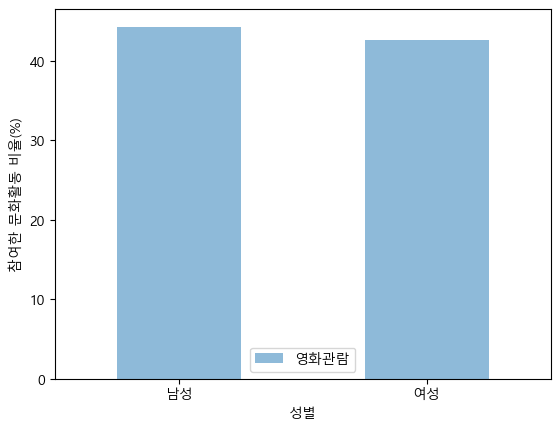

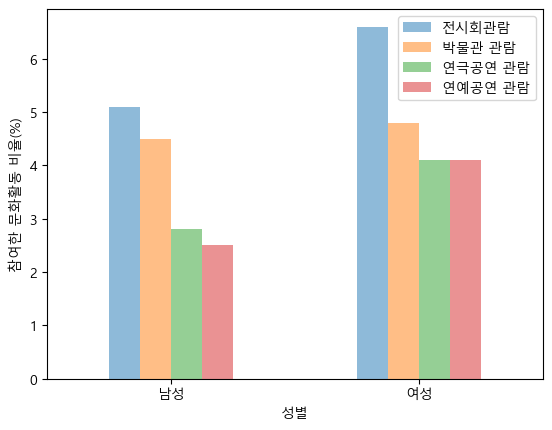

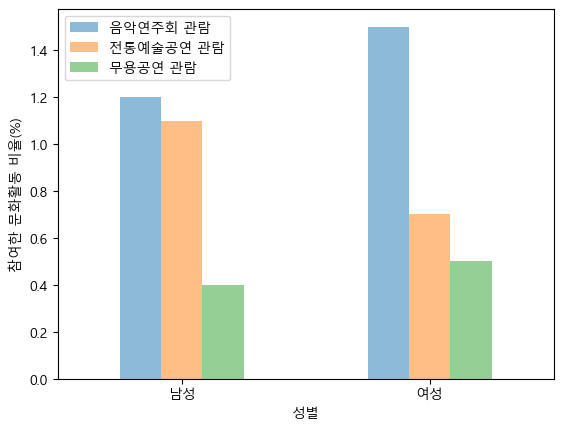

In [188]:
df_gender = df1.iloc[[1,2]]
df_gender0 = df_gender.drop(['표본수','음악연주회 관람','전통예술공연 관람','무용공연 관람','전시회관람','박물관 관람','연극공연 관람','연예공연 관람'], axis=1)
df_gender1 = df_gender.drop(['표본수','영화관람','음악연주회 관람','전통예술공연 관람','무용공연 관람'],axis=1)
df_gender2 = df_gender.drop(['표본수','영화관람','전시회관람','박물관 관람','연극공연 관람','연예공연 관람'],axis=1)
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import matplotlib.pyplot as plt

df_gender0.plot.bar(alpha = 0.5)
plt.xticks(rotation=0)
plt.xlabel('성별')
plt.ylabel('참여한 문화활동 비율(%)')
plt.xticks([0,1], ['남성', '여성'])
df_gender1.plot.bar(alpha = 0.5)
plt.xticks(rotation=0)
plt.xlabel('성별')
plt.ylabel('참여한 문화활동 비율(%)')
plt.xticks([0,1], ['남성', '여성'])
df_gender2.plot.bar(alpha = 0.5)
plt.xticks(rotation=0)
plt.xlabel('성별')
plt.ylabel('참여한 문화활동 비율(%)')
plt.xticks([0,1], ['남성', '여성'])
df_gender

([<matplotlib.axis.XTick at 0x1fa1d355910>,
 [Text(0, 0, '남성'), Text(1, 0, '여성')])

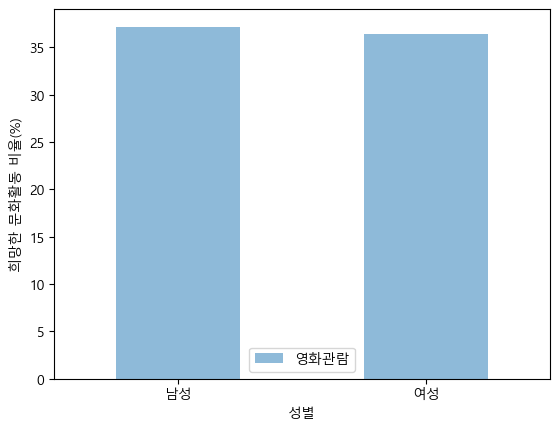

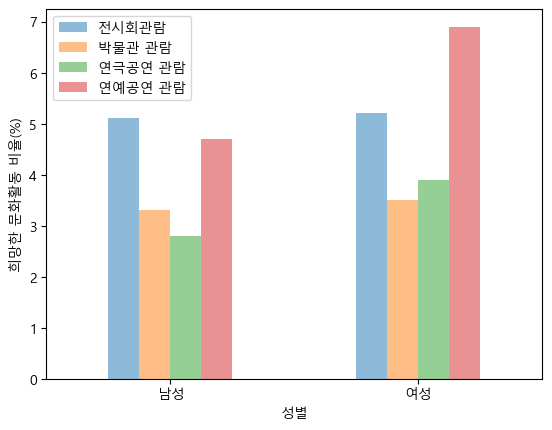

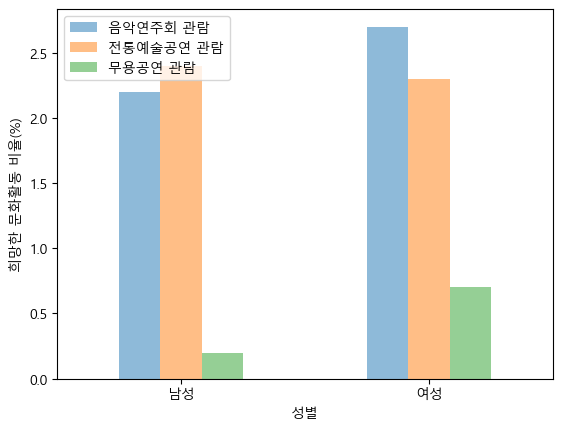

In [189]:
df_gender = df2.iloc[[1,2]]
df_gender0 = df_gender.drop(['표본수','음악연주회 관람','전통예술공연 관람','무용공연 관람','전시회관람','박물관 관람','연극공연 관람','연예공연 관람'], axis=1)
df_gender1 = df_gender.drop(['표본수','영화관람','음악연주회 관람','전통예술공연 관람','무용공연 관람'],axis=1)
df_gender2 = df_gender.drop(['표본수','영화관람','전시회관람','박물관 관람','연극공연 관람','연예공연 관람'],axis=1)
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import matplotlib.pyplot as plt

df_gender0.plot.bar(alpha = 0.5)
plt.xticks(rotation=0)
plt.xlabel('성별')
plt.ylabel('희망한 문화활동 비율(%)')
plt.xticks([0,1], ['남성', '여성'])
df_gender1.plot.bar(alpha = 0.5)
plt.xticks(rotation=0)
plt.xlabel('성별')
plt.ylabel('희망한 문화활동 비율(%)')
plt.xticks([0,1], ['남성', '여성'])
df_gender2.plot.bar(alpha = 0.5)
plt.xticks(rotation=0)
plt.xlabel('성별')
plt.ylabel('희망한 문화활동 비율(%)')
plt.xticks([0,1], ['남성', '여성'])

가설(1) 성별에 따른 문화생활의 관람 차이의 경우 문화생활의 종류에 따라서 조금의 차이를 볼 수 있었다.
 먼저 전시회 관람, 연예공연 관람, 음악연주회 관람의 경우 여성이 남성보다 조금 더 참여하였고 다른 영역의 경우도 성별간에 조금씩 차이를 보이긴 했지만 유의미한 차이는 볼 수 없었다.
 성별에 따른 문화생활의 선호도 차이 또한 문화생활의 종류에 따라서 그 정도는 달랐지만 유의미한 차이를 확인할 수는 없었다.

### 가설(2) 검증과정

-가설 (2) 중 나이대에 따라 문화활동의 차이가 있는지를 비교해 보았다.
 위에서 확인한 평균 값을 토대로 가설 확인에 용이하도록 총 3개 [영화관람][음악연주회 관람,전통예술공연 관람,무용공연 관람] [전시회관람,박물관 관람.연극공연 관람,연예공연 관람] 로 데이터를 나누어서 그래프를 표현하였다.

,영화관람
3,70.3
4,74.3
5,58.6
6,50.7
7,34.9
8,19.2
9,7.8


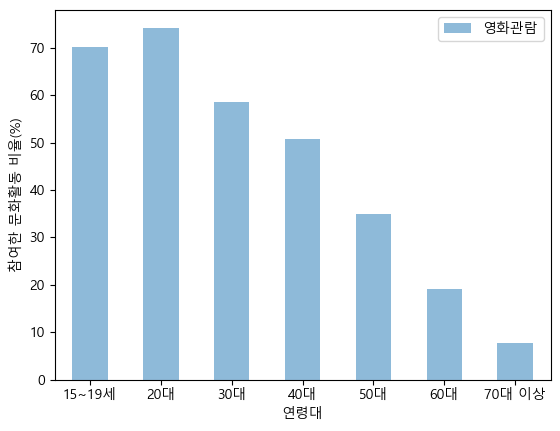

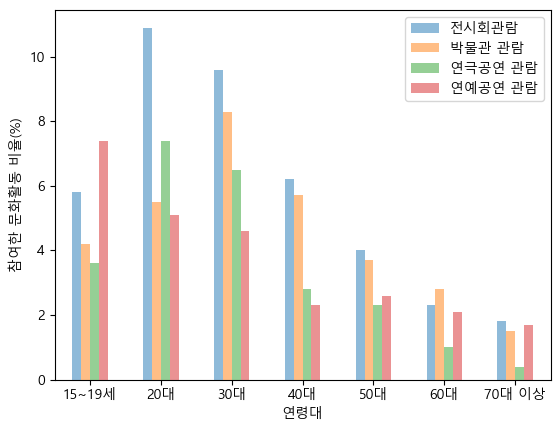

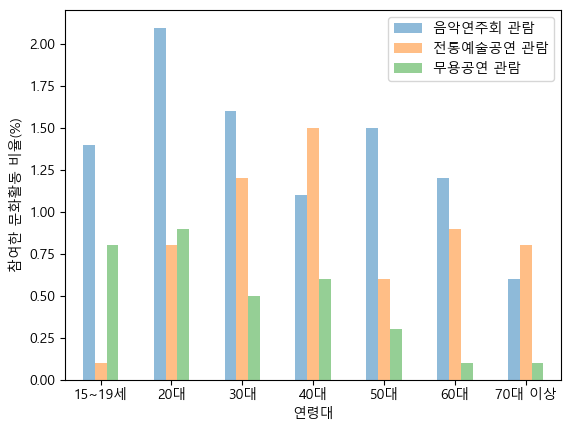

In [190]:
df_age = df1.iloc[[3,4,5,6,7,8,9]]
df_age0 = df_age.drop(['분류','표본수','음악연주회 관람','전통예술공연 관람','무용공연 관람','전시회관람','박물관 관람','연극공연 관람','연예공연 관람'], axis=1)
df_age1 = df_age.drop(['표본수','영화관람','음악연주회 관람','전통예술공연 관람','무용공연 관람'],axis=1)
df_age2 = df_age.drop(['표본수','영화관람','전시회관람','박물관 관람','연극공연 관람','연예공연 관람'],axis=1)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import matplotlib.pyplot as plt

df_age0.plot.bar(alpha = 0.5)
plt.xticks(rotation=0)
plt.xlabel('연령대')
plt.ylabel('참여한 문화활동 비율(%)')
plt.xticks([0,1,2,3,4,5,6], ['15~19세', '20대', '30대','40대','50대','60대','70대 이상'])
df_age1.plot.bar(alpha = 0.5)
plt.xticks(rotation=0)
plt.xlabel('연령대')
plt.ylabel('참여한 문화활동 비율(%)')
plt.xticks([0,1,2,3,4,5,6], ['15~19세', '20대', '30대','40대','50대','60대','70대 이상'])
df_age2.plot.bar(alpha = 0.5)
plt.xticks(rotation=0)
plt.xlabel('연령대')
plt.ylabel('참여한 문화활동 비율(%)')
plt.xticks([0,1,2,3,4,5,6], ['15~19세', '20대', '30대','40대','50대','60대','70대 이상'])
df_age0

In [191]:
df_age = df_age.drop(['분류','표본수'], axis=1)
df_age

,영화관람,전시회관람,박물관 관람,연극공연 관람,연예공연 관람,음악연주회 관람,전통예술공연 관람,무용공연 관람
3,70.3,5.8,4.2,3.6,7.4,1.4,0.1,0.8
4,74.3,10.9,5.5,7.4,5.1,2.1,0.8,0.9
5,58.6,9.6,8.3,6.5,4.6,1.6,1.2,0.5
6,50.7,6.2,5.7,2.8,2.3,1.1,1.5,0.6
7,34.9,4.0,3.7,2.3,2.6,1.5,0.6,0.3
8,19.2,2.3,2.8,1.0,2.1,1.2,0.9,0.1
9,7.8,1.8,1.5,0.4,1.7,0.6,0.8,0.1


이렇게 3개로 데이터를 나누어서 그래프를 그려본 결과. 가설에서처럼 대다수의 영역에서 20 ~ 30대의 문화생활 관람 경험이 다른 연령층에 비해서 높음을 확인할 수 있었다. 또한 한가지 더 특이한 부분을 찾을 수 있었는데 그래프를 보면 10대의 경우 문화생활의 종류에 따른 참여한 문화생활이 다른 계층에 비해서 편차가 큼을 확인할 수 있었다. 
영화관람, 연예공연 관람과 같은 문화생활의 경우 20~30대 계층과 비슷하거나 더 많이 참여하였지만 연극공연 관람,전통예술 공연의 경우 적은 참여를 했다.
 1. 20~30대의 경우 다른 연령층보다 문화생활에 적극적인 참여를 한다.
 2. 40대 이후부터는 연령대가 높아질수록 문화생활에 소극적인 참여를 한다.
 3. 15~19세의 경우 문화생활의 종류와 선호도에 따라서 참여율의 편차가 다른 연령층 보다 크다.

### 가설(3) 검증과정

([<matplotlib.axis.XTick at 0x1fa1ac31fd0>,
 [Text(0, 0, '1미만'),
  Text(1, 0, '1~2'),
  Text(2, 0, '2~3'),
  Text(3, 0, '3~4'),
  Text(4, 0, '4~5'),
  Text(5, 0, '5~6'),
  Text(6, 0, '6이상')])

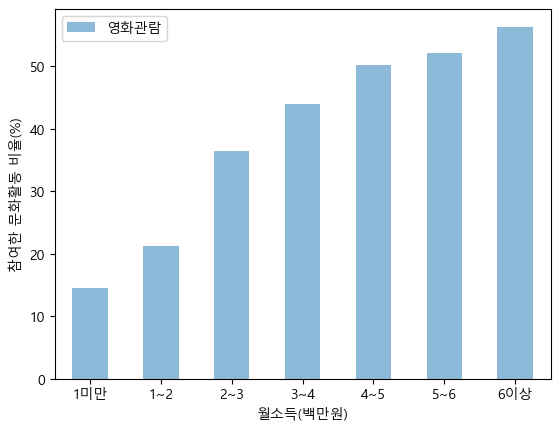

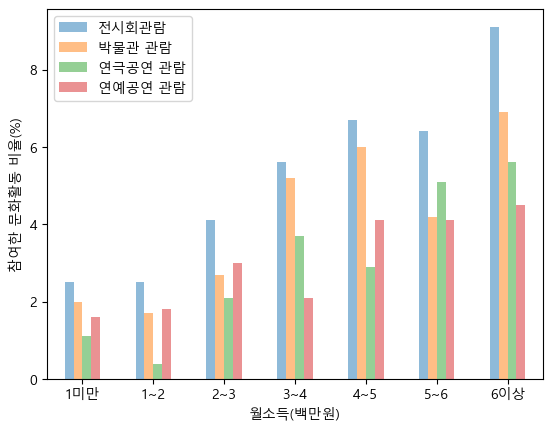

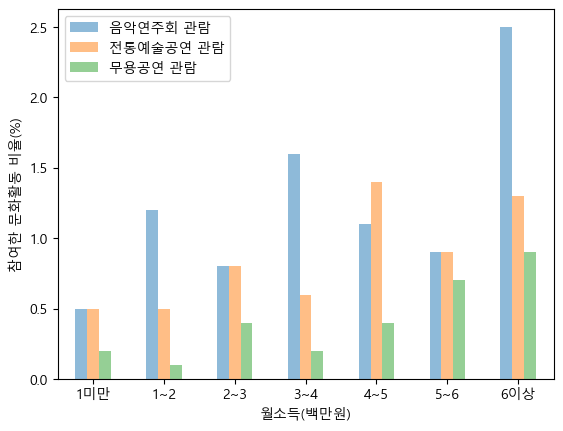

In [192]:
df_money = df1.iloc[[30,31,32,33,34,35,36]]
df_money0 = df_money.drop(['표본수','음악연주회 관람','전통예술공연 관람','무용공연 관람','전시회관람','박물관 관람','연극공연 관람','연예공연 관람'], axis=1)
df_money1 = df_money.drop(['표본수','영화관람','음악연주회 관람','전통예술공연 관람','무용공연 관람'],axis=1)
df_money2 = df_money.drop(['표본수','영화관람','전시회관람','박물관 관람','연극공연 관람','연예공연 관람'],axis=1)
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import matplotlib.pyplot as plt

df_money0.plot.bar(alpha = 0.5)
plt.xticks(rotation=0)
plt.xlabel('월소득(백만원)')
plt.ylabel('참여한 문화활동 비율(%)')
plt.xticks([0,1,2,3,4,5,6], ['1미만','1~2', '2~3', '3~4','4~5','5~6','6이상'])
df_money1.plot.bar(alpha = 0.5)
plt.xticks(rotation=0)
plt.xlabel('월소득(백만원)')
plt.ylabel('참여한 문화활동 비율(%)')
plt.xticks([0,1,2,3,4,5,6], ['1미만','1~2', '2~3', '3~4','4~5','5~6','6이상'])
df_money2.plot.bar(alpha = 0.5)
plt.xticks(rotation=0)
plt.xlabel('월소득(백만원)')
plt.ylabel('참여한 문화활동 비율(%)')
plt.xticks([0,1,2,3,4,5,6], ['1미만','1~2', '2~3', '3~4','4~5','5~6','6이상'])

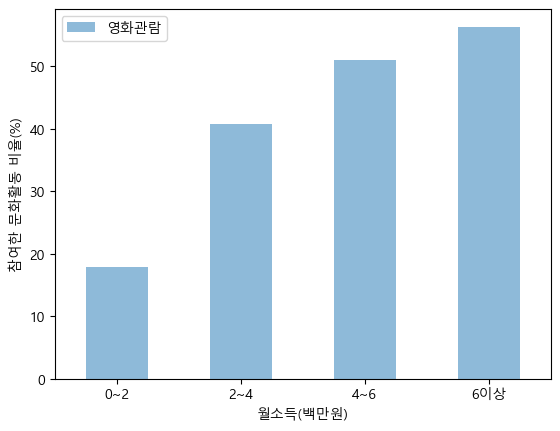

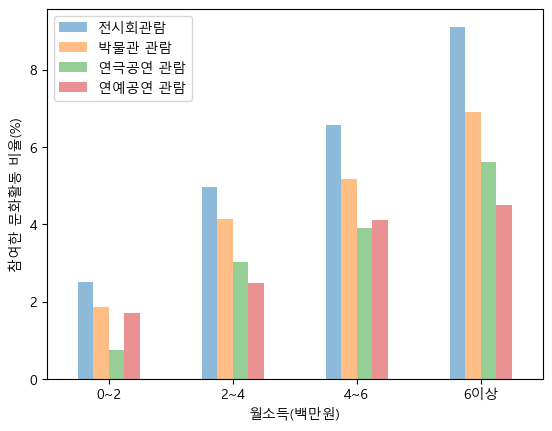

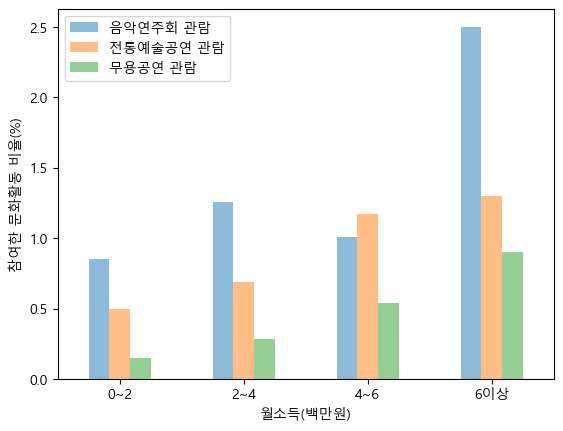

In [193]:
df_money = df1.iloc[[30,31,32,33,34,35,36]]
df_money0 = df_money.drop(['표본수','음악연주회 관람','전통예술공연 관람','무용공연 관람','전시회관람','박물관 관람','연극공연 관람','연예공연 관람'], axis=1)
df_money0 = df_money0.T
df_money0 = df_money0.drop(['분류'], axis=0)
df_money0[30] = (df_money0[30]*9.99 +  df_money0[31]*10.12)/20.11
df_money0[31] = (df_money0[32]*14.21 + df_money0[33]*18.96)/33.17
df_money0[32] = (df_money0[34]*16.11 + df_money0[35]*13.8)/29.91
df_money0[33] = df_money0[36]
df_money0.drop([34,35,36], axis=1, inplace=True)
df_money0 = df_money0.T
df_money0.plot.bar(alpha=0.5)
plt.xticks(rotation=0)
plt.xlabel('월소득(백만원)')
plt.ylabel('참여한 문화활동 비율(%)')
plt.xticks([0,1,2,3], ['0~2','2~4', '4~6','6이상'])
plt.show()
df_money1 = df_money.drop(['표본수','영화관람','음악연주회 관람','전통예술공연 관람','무용공연 관람'],axis=1)
df_money1 = df_money1.T
df_money1 = df_money1.drop(['분류'], axis=0)
df_money1[30] = (df_money1[30]*9.99 +  df_money1[31]*10.12)/20.11
df_money1[31] = (df_money1[32]*14.21 + df_money1[33]*18.96)/33.17
df_money1[32] = (df_money1[34]*16.11 + df_money1[35]*13.8)/29.91
df_money1[33] = df_money1[36]
df_money1.drop([34,35,36], axis=1, inplace=True)
df_money1 = df_money1.T
df_money1.plot.bar(alpha=0.5)
plt.xticks(rotation=0)
plt.xlabel('월소득(백만원)')
plt.ylabel('참여한 문화활동 비율(%)')
plt.xticks([0,1,2,3], ['0~2','2~4', '4~6','6이상'])
plt.show()
df_money2 = df_money.drop(['표본수','영화관람','전시회관람','박물관 관람','연극공연 관람','연예공연 관람'],axis=1)
df_money2 = df_money2.T
df_money2 = df_money2.drop(['분류'], axis=0)
df_money2[30] = (df_money2[30]*9.99 +  df_money2[31]*10.12)/20.11
df_money2[31] = (df_money2[32]*14.21 + df_money2[33]*18.96)/33.17
df_money2[32] = (df_money2[34]*16.11 + df_money2[35]*13.8)/29.91
df_money2[33] = df_money2[36]
df_money2.drop([34,35,36], axis=1, inplace=True)
df_money2 = df_money2.T
df_money2.plot.bar(alpha=0.5)
plt.xticks(rotation=0)
plt.xlabel('월소득(백만원)')
plt.ylabel('참여한 문화활동 비율(%)')
plt.xticks([0,1,2,3], ['0~2','2~4', '4~6','6이상'])
plt.show()


먼저 첫번째 그래프 3개의 경우 월소득 1백만원을 기준으로 참여한 문화활동을 보여준다.
전반적으로 소득이 증가할수록 모든 문화활동의 참여도가 증가함을 대략적으로 확인할 수 있었다.
두번째로는 "일정소득을 넘어가면 문화활동의 참여도의 차이가 없을 것이다."라는 가설을 검증해보기 위해 0 ~ 2백만원 2 ~ 4백만원 4 ~ 6백만원, 6백만원 이상. 이렇게 4집단으로 분류를 한 후 그래프를 그려보았다.
(문화활동 참여 비율에 표본수를 곱하여 1집단을 구성한 다음 한 집단의 표본수로 나누어서 소득대가 다른 두 집단이 합쳐지더라도 데이터의 정확도를 유지시키며 가설을 검증했다)
 2번째에 나온 그래프 3개의 경우 보다 확실하게 소득이 점점 올라갈수록 문화활동의 참여도가 계속해서 증가함을 확인할 수 있었다.
 음악연주회 관람 중 (2 ~ 4 : 4 ~ 6)의 경우를 제외하고는 소득이 증가함에 따라 모든 문화활동에서 더 높은 참여도를 보이는 소득과 문화활동의 참여도의 높은 연관성을 알 수 있었다.

In [194]:
df_age.mean(axis=0, skipna=False)

영화관람         45.114286
전시회관람         5.800000
박물관 관람        4.528571
연극공연 관람       3.428571
연예공연 관람       3.685714
음악연주회 관람      1.357143
전통예술공연 관람     0.842857
무용공연 관람       0.471429
dtype: float64

### 가설(4) 검증과정

In [195]:
df2 = pd.read_excel("평일에_희망하는_여가활동_복수응답__문화예술_관람활동_20230519033125.xlsx")
df2 = df2.drop(['통계분류(1)'],axis='columns')
df2.rename(columns= {'통계분류(2)': '분류'}, inplace=True)
df2 = df2.replace({'연예공연 관람': '-'}, 0)
df2 = df2.replace({'음악연주회 관람': '-'}, 0)
df2 = df2.replace({'전통예술공연 관람': '-'}, 0)
df2 = df2.replace({'무용공연 관람': '-'}, 0)
df2 = df2.T
df2_0 = df2.drop(['분류','표본수'],axis=0)
df2_0 = df2_0[0]*10049
df1 = pd.read_excel("지난_1년_동안_한번이상_참여한_여가활동_유형_복수응답_문화예술관람활동_20230519032934.xlsx")
df1 = df1.drop(['통계분류(1)'],axis='columns')
df1.rename(columns= {'통계분류(2)': '분류'}, inplace=True)
df1.set_index("분류")
df1 = df1.replace({'연예공연 관람': '-'}, 0)
df1 = df1.replace({'음악연주회 관람': '-'}, 0)
df1 = df1.replace({'전통예술공연 관람': '-'}, 0)
df1 = df1.replace({'무용공연 관람': '-'}, 0)
df1 = df1.T
df1_0 = df1.drop(['분류','표본수'],axis=0)
df1_0 = df1_0[0]*10049
df3 = pd.read_excel("휴일에_희망하는_여가활동_복수응답__문화예술_관람활동_20230519033146.xlsx")
df3 = df3.drop(['통계분류(1)'],axis='columns')
df3.rename(columns= {'통계분류(2)': '분류'}, inplace=True)
df3.set_index("분류")
df3 = df3.replace({'연예공연 관람': '-'}, 0)
df3 = df3.replace({'음악연주회 관람': '-'}, 0)
df3 = df3.replace({'전통예술공연 관람': '-'}, 0)
df3 = df3.replace({'무용공연 관람': '-'}, 0)
df3 = df3.T
df3_0 = df3.drop(['분류','표본수'],axis=0)
df3_0 = df3_0[0]*10049
df0_0 = df1_0/(df2_0*2.1+df3_0)*3.1
df0_0

무용공연 관람      0.925373
박물관 관람       1.395594
연극공연 관람       0.91716
연예공연 관람      0.497085
영화관람         1.112085
음악연주회 관람     0.607843
전시회관람        1.201708
전통예술공연 관람    0.370027
Name: 0, dtype: object

통계청에서 조사한 자료인 
(1년동안 참여한 여가활동 통계자료),()

([<matplotlib.axis.XTick at 0x1fa1c181760>,
 [Text(0, 0, '전통예술'),
  Text(1, 0, '연예공연'),
  Text(2, 0, '음악연주회'),
  Text(3, 0, '연극공연'),
  Text(4, 0, '무용공연'),
  Text(5, 0, '영화'),
  Text(6, 0, '전시회'),
  Text(7, 0, '박물관')])

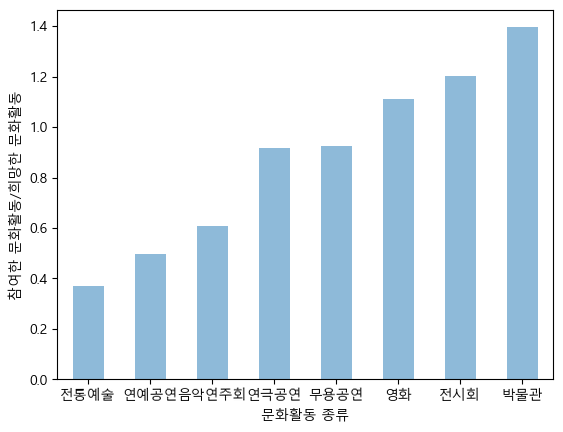

In [196]:
df0_0 = df0_0.sort_values()
df0_0.plot.bar(alpha = 0.5)
plt.xticks(rotation=0.5)
plt.xlabel('문화활동 종류')
plt.ylabel('참여한 문화활동/희망한 문화활동')
plt.xticks([0,1,2,3,4,5,6,7],['전통예술','연예공연','음악연주회','연극공연','무용공연','영화','전시회','박물관'],rotation=0.5)

 위 그래프는 y축의 값이 1에 가까울수록 해당 문화활동을 희망한 사람 수 만큼 실제로 문화활동에 참여했음을 보여준다.
또한 해당 설문조사가 진행되었던 2023년 기준 휴일은 116일 평일은 249일 이기 때문에 df1_0 에는 가중치 1을 부여하였고
df2_0 즉 평일에 희망한 여가활동에 가중치 2.1을 주어 분석의 정확도를 높였다.
 그래프를 통해 가설을 검증해보면 예상과 다르게 희망한 문화활동과 참여한 문화활동의 연관성은  크지 않았다. 
 연극공연,무용공연과 같은 문화활동의 경우 1.1~1.2 부근으로 희망한 사람의 약 115%정도의 사람들이 실제로 참여를 해서 두 데이터 간의 연관성을 찾을 수 있었다.
 하지만 연예공연의 경우 0.49 즉 희망한 사람의 50% 절반정도 되는 숫자의 사람들만이 실제로 연예공연관람을 했다.
 또한 전통예술공연의 경우에는 더욱 극단적인 값 0.37이 나왔다.
 따라서 이 그래프를 통해서 희망하는 문화활동과 실제로 참여한 문화활동간의 연관성의 경우 문화활동의 종류에 따라 연관성의 차이가 매우 큼을 알 수 있었다.

3가지 통계 모두 같은 표본을 대상으로 조사를 하였기 때문에 표본수가 같다.

## 5. 결론
가설
1. 성별에 따른 문화활동 관람 수 차이 및 선호도 차이는 없을 것이다. 
-> 그렇다. 그래프상에서 약간씩의 차이를 보이기는 했지만 유의미한 수치는 나오지 않았다.
 
2. 20,30대의 경우 다른 연령층에 비해서 문화생활 관람 수가 높을 것이다.
-> 그렇다. 대부분은 문화활동에서 20,30대의 경우 다른 연령층 보다 높은 참여도를 보였다.
-> 특이점. 다만 영화관람, 연예공연 관람과 같은 항목의 경우 15~19세의 매우 높은 참여도를 보였다.
 
3. 소득이 높을 수록 문화생활 방문을 더 자주 할 것이지만 일정 수준 이상의 소득 부터는 차이를 보이지 않을 것이다.
-> 약간 다르다. 소득이 높을 수록 문화활동의 참여도가 높아졌다
-> 특이점 또한 가설과 달리 1백만원 -> 6백만원까지의 월소득으로 갈때 계속해서 이전 그룹보다 더 높은 참여도를 보였다.
 
4. 더 많이 선호하는 문화생활의 경우 실제로 더 많이 참여하였을 것이다.
-> 아니다. 일부 항목의 경우 실제로 희망하는 수만큼의 참여도를 보여주었지만 그렇지 않은 문화활동도 존재하였다.
-> 참여한 문화활동/희망한 문화활동의 값이 문화활동의 종류에 따라 0.37~1.39로 편차가 큰 것으로 보았을 때 문화활동의 선호도와
참여도의 연관성을 찾기는 어려웠다.